BMI 500: HW 11, Problem 2.

In [ ]:
"""
@author Chase Fensore
@date November 7 2022
"""

[Cited from Sameni, R.]

**Proposed Model I**: the fatal susceptible-exposed-infected-recovered
(SEIR) model for coronavirus modeling with a unique recovery group


1) s(t): The susceptible population fraction (the number of
individuals in danger of being infected, divided by the total
population).
2) e(t): The exposed population fraction (the number of individuals exposed to the virus but without having symptoms,
divided by the total population).
3) i(t): The infected population fraction (the number of
infected individuals with symptoms, divided by the total
population).
4) r(t): The recovered population fraction (the number of
recovered individuals, divided by the total population).
5) p(t): The number of individuals that pass away due to the
disease, divided by the total population).

**System closure constraint**: s(t) + e(t) + i(t) + r(t) + p(t) = 1

Notes: 
-  all except e(t) are directly measurable (with potential errors.
- κ = 6/14 = 0.43 inverse days) in our model. 

In [19]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def SEIRP(alpha_e, alpha_i, kappa, rho, beta, mu, gamma, s0, e0, i0, r0, p0, T, dt):
    """
    Model for Proposed Model I: the fatal susceptible-exposed-infected-recovered-passed (SEIRP) 
    model for coronavirus modeling 
    """
    K = round(T/dt)
    s = np.zeros((1, K)) # Build arrays for SEIRP
    e = np.zeros((1, K))
    i = np.zeros((1, K))
    r = np.zeros((1, K))
    p = np.zeros((1, K))
    # Initialize values for each group (SEIRP) base on inputs
    s[0,0] = s0
    e[0,0] = e0
    i[0,0] = i0
    r[0,0] = r0
    p[0,0] = p0

    for t in range(0, K-1):
        # Drawing from Model I: figure (27)
        s[0,t + 1] = (-alpha_e[0,t] * s[0,t] * e[0,t] - alpha_i[0,t] * s[0,t] * i[0,t] + gamma[0,t] * r[0,t]) * dt + s[0,t]
        e[0,t + 1] = (alpha_e[0,t] * s[0,t] * e[0,t] + alpha_i[0,t] * s[0,t] * i[0,t] - kappa[0,t] * e[0,t] - rho[0,t] * e[0,t]) * dt + e[0,t]
        i[0,t + 1] = (kappa[0,t] * e[0,t] - beta[0,t] * i[0,t] - mu[0,t] * i[0,t])* dt + i[0,t]
        r[0,t + 1] = (beta[0,t] * i[0,t] + rho[0,t] * e[0,t] - gamma[0,t] * r[0,t]) * dt + r[0,t]
        p[0,t + 1] = (mu[0,t] * i[0,t]) * dt + p[0,t]

    return s,e,i,r,p # Return values for each group of the population (should add to 1)

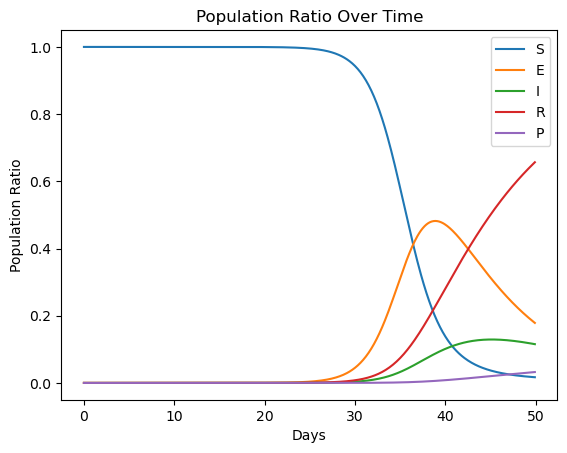

In [26]:
"""TESTS"""
# Run SEIRP staring with initial values... then see results.
"""Case 1: Immunizing disease"""
T = 50 # In days
dt = 0.1 # Time step in days
K = round(T/dt) # TODO: how to round? 
alpha_e = 0.65*np.ones((1, K)) # Note: alpha_e >> alpha_i
alpha_i = 0.005*np.ones((1, K)) 
kappa = 0.05*np.ones((1, K)) # Note: kappa could be 0.43 (assuming 99.75% as target infection drop-out threshold)
rho = 0.08*np.ones((1, K))
beta = 0.1*np.ones((1, K))
mu = 0.02*np.ones((1, K))
gamma = 0.0*np.ones((1,K))
N = 84.0e6
e0 = 1/N
s0 = 1 - e0
i0 = 0
r0 = 0
p0 = 0

s,e,i,r,p = SEIRP(alpha_e, alpha_i, kappa, rho, beta, mu, gamma, s0, e0, i0, r0, p0, T, dt)
# Plot results: 
t  = np.arange(0,K/10, dt, dtype=float)
plt.plot(t, s[0,:], label="S")
# print(np.shape(s[0,:]), " ", np.shape(t))
plt.plot(t, e[0,:], label="E")
plt.plot(t, i[0,:], label="I")
plt.plot(t, r[0,:], label="R")
plt.plot(t, p[0,:], label="P")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Population Ratio")
plt.title("Population Ratio Over Time")
plt.show()


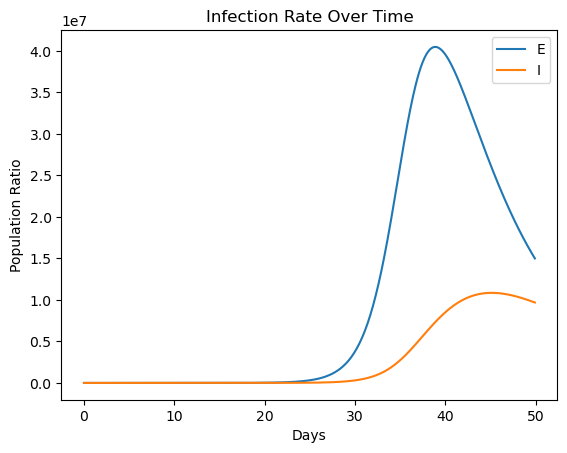

In [25]:
"""TEST: Plot infection rate over time"""
plt.plot(t, e[0,:]*N, label="E")
plt.plot(t, i[0,:]*N, label="I")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Population Ratio")
plt.title("Infection Rate Over Time")
plt.show()